In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import glob

In [52]:
y= [] #labels
X = [] #image

def load_data(path,label):
    files = glob.glob(path+"*.jpg")
    print(path)
    ctr=0
    for myFile in files:
        image = cv2.imread (myFile,0)
        # image = cv2.resize(image, (48, 48))
        X.append(image)
        y.append(label)
        ctr+=1
    print(ctr,'files')



In [53]:
base_path = 'Dataset\\images\\train\\'
emotions = ['angry','disgust','fear','happy','neutral','sad','surprise']
cls=1
for i in emotions:
    load_data(base_path+i+'\\',cls)
    cls+=1

#'Dataset\\images\\train\\angry\\'

Dataset\images\train\angry\
3993 files
Dataset\images\train\disgust\
436 files
Dataset\images\train\fear\
4103 files
Dataset\images\train\happy\
7164 files
Dataset\images\train\neutral\
4982 files
Dataset\images\train\sad\
4938 files
Dataset\images\train\surprise\
3205 files


In [54]:
X_data = np.asarray(X)
y_data = np.array(y)
print(X_data.shape)
print(y_data.shape)

(28821, 48, 48)
(28821,)


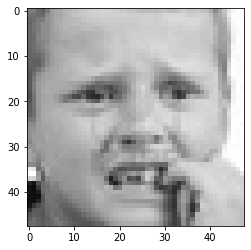

3

In [35]:
k=4444
_ = X[k]
plt.imshow(_)
plt.show()

y[k]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,random_state=42,test_size=0.25)

In [30]:
from sklearn.svm import SVC
sv_cls = SVC()
sv_cls.fit(X_train.reshape(X_train.shape[0], 2304),y_train)

pred1 = sv_cls.predict(X_test.reshape(X_test.shape[0], 48*48))
accuracy = accuracy_score(y_test, pred1)
print("accuracy",accuracy)

accuracy 0.4315847904524008


In [61]:
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

print(X_train.shape)
print(X_test.shape)


(21615, 48, 48, 1)
(7206, 48, 48, 1)


Deep Learning Models

In [12]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras

In [13]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [14]:
def FER_Model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 7
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)#the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
    conv2_2 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)#the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    conv3_2 = BatchNormalization()(conv3_2)
    conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
    conv3_3 = BatchNormalization()(conv3_3)
    conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
    conv3_4 = BatchNormalization()(conv3_4)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)#the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)
    
    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
    conv5_3 = BatchNormalization()(conv5_3)
    conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
    conv5_3 = BatchNormalization()(conv5_3)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)#Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)# create model 
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())
    
    return model


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

In [66]:
testgen = ImageDataGenerator(rescale=1./255)
datagen.fit(X_train)

In [67]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

In [64]:
model = FER_Model()
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_34 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_35 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
pool1_1 (MaxPooling2D)       (None, 24, 24, 64)        0         
_________________________________________________________________
drop1_1 (Dropout)            (None, 24, 24, 64)        0   

C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [72]:
batch_size=64
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

# y_train = to_categorical(y_train, 6)
# y_test = to_categorical(y_test, 6)

IndexError: index 7 is out of bounds for axis 1 with size 7

In [68]:
num_epochs = 100  
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                      
                    validation_data=test_flow)

C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100


ValueError: in user code:

    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:862 train_function  *
        return step_function(self, iterator)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:852 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:845 run_step  **
        outputs = model.train_step(data)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\training.py:803 train_step
        loss = self.compiled_loss(
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\losses.py:1679 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\backend.py:4875 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\uttam\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 7) are incompatible
